<a href="https://colab.research.google.com/github/Yandarma/tugas-4/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, Markdown


from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [2]:
sns.set(style="darkgrid")

In [3]:
plt.style.use('dark_background')

# Interesting Task Ideas
1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

In [4]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# save filepath to variable for easier access
netflix_file_path = '../content/drive/My Drive/Data Analytics/netflix_titles.csv'
# read the data and store data in DataFrame titled melbourne_data
netflix_data = pd.read_csv(netflix_file_path) 
# print a summary of the data in Melbourne data
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
display(Markdown('#### head 2'))
display(netflix_data.head(2))
display(Markdown('#### tail 2'))
display(netflix_data.tail(2))

#### head 2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


#### tail 2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# observation
* checking about metrix shape & size
* normal eda done
* now clearning data
* featrue manuplation  `date_added, duration`

In [11]:
netflix_data.shape

(8807, 12)

In [12]:
netflix_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


this dataset have null values let's check it out

In [13]:
print('column name    number null')
print(netflix_data.isnull().sum())
print('how many null rate in columnes')
for i in netflix_data.columns:
    null_percenta=(netflix_data[i].isnull().sum()/len(netflix_data))*100
    if null_percenta>0:
        print(f'{i} null rate {round(null_percenta,2)}%')
        
print('='*20,f'\nduplicate rate {(netflix_data.duplicated().sum()/len(netflix_data))*100 } % ')  # you can check that column have or not dublicat value , through just uncommenting
# netflix_data.drop_duplicates(inplace=True)


column name    number null
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
how many null rate in columnes
director null rate 29.91%
cast null rate 9.37%
country null rate 9.44%
date_added null rate 0.11%
rating null rate 0.05%
duration null rate 0.03%
duplicate rate 0.0 % 


we can lock also in parcentage

In [14]:
netflix_data.dropna(axis=0,inplace=True)
netflix_data.drop_duplicates(inplace=True)

In [15]:
netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'])
netflix_data['date_added_month']=netflix_data['date_added'].dt.month
netflix_data['date_added_month_name']=netflix_data['date_added'].dt.month_name()
netflix_data['date_added_year']=netflix_data['date_added'].dt.year
netflix_data['date_added_day']=netflix_data['date_added'].dt.day

In [16]:
netflix_data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_month_name,date_added_year,date_added_day
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021,23


In [17]:
netflix_data['date_added_year'].value_counts().sort_values(ascending=False)

2019    1265
2020    1194
2018    1101
2021     755
2017     724
2016     202
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2008       1
2010       1
Name: date_added_year, dtype: int64

In [18]:
netflix_data.groupby('type')['type'].count()

type
Movie      5185
TV Show     147
Name: type, dtype: int64

In [19]:
# top rating movie
netflix_data.sort_values(by='rating',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_month_name,date_added_year,date_added_day
7988,s7989,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France",2017-07-10,2016,UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...,7,July,2017,10
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,9,September,2019,1
7058,s7059,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,2019-06-06,1974,UR,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...,6,June,2019,6
6581,s6582,Movie,Dear Dracula,Chad Van De Keere,"Nathan Gamble, Ray Liotta, Emilio Estevez, Ari...",United States,2016-02-18,2012,TV-Y7-FV,43 min,"Children & Family Movies, Comedies",When he gets a fan letter from a young monster...,2,February,2016,18
7513,s7514,Movie,Motu Patlu: King of Kings,Suhas Kadav,"Saurav Chakrabarty, Vinay Pathak",India,2017-07-06,2016,TV-Y7-FV,109 min,"Children & Family Movies, Comedies",Motu and Patlu want to help a circus lion get ...,7,July,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,s7155,Movie,Justin Bieber: Never Say Never,Jon M. Chu,"Justin Bieber, Ludacris, Usher Raymond, Jaden ...",United States,2018-01-01,2011,G,106 min,"Documentaries, Music & Musicals",Teen idol Justin Bieber provides personal snap...,1,January,2018,1
6151,s6152,Movie,An American Tail,Don Bluth,"Erica Yohn, Nehemiah Persoff, Amy Green, Phill...",United States,2018-04-01,1986,G,80 min,Children & Family Movies,"Fievel, a young Russian mouse, immigrates to A...",4,April,2018,1
6152,s6153,Movie,An American Tail: Fievel Goes West,"Phil Nibbelink, Simon Wells","Philip Glasser, James Stewart, Erica Yohn, Cat...",United States,2018-04-01,1991,G,75 min,Children & Family Movies,Fievel and his family head west for what turns...,4,April,2018,1
6153,s6154,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,2018-04-01,1999,G,75 min,Children & Family Movies,When a monster goes on a mouse-napping spree i...,4,April,2018,1


In [20]:

netflix_data.date_added.dtype

dtype('<M8[ns]')

In [21]:
netflix_date=netflix_data['date_added'].dropna(axis=0)
# netflix_date['date_added'].apply(lambda x:x.split())

# which country have Maximum number of movies

United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: country, dtype: int64


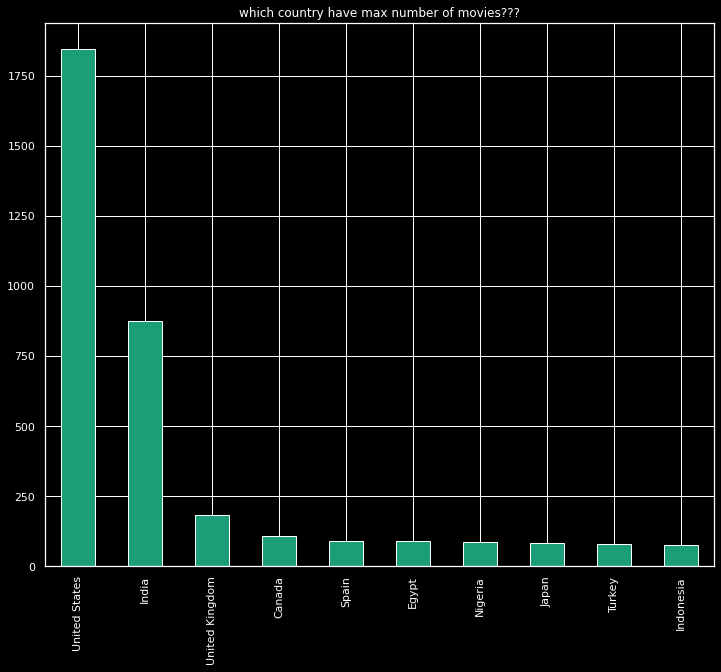

In [22]:
print(netflix_data.country.value_counts()[:10])
plt.figure(figsize=(12,10))
netflix_data.country.value_counts()[:10].plot.bar(colormap='Dark2',)
plt.title('which country have max number of movies???')
plt.show()

# which type of thing people like to watch

Movie      5185
TV Show     147
Name: type, dtype: int64


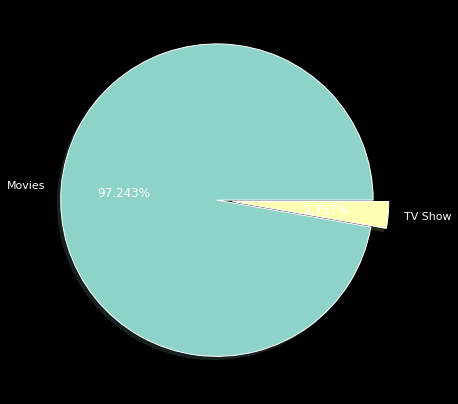

In [23]:
plt.figure(figsize=(7,9))
print(netflix_data['type'].value_counts())
plt.pie(netflix_data['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.1,0],)
plt.show()

In [24]:
# let's check out number of unique values inside the colummns
for i in netflix_data.columns:
    print(f'{i}  ====> {netflix_data[i].nunique()}')

show_id  ====> 5332
type  ====> 2
title  ====> 5332
director  ====> 3945
cast  ====> 5200
country  ====> 604
date_added  ====> 1450
release_year  ====> 72
rating  ====> 14
duration  ====> 198
listed_in  ====> 335
description  ====> 5321
date_added_month  ====> 12
date_added_month_name  ====> 12
date_added_year  ====> 14
date_added_day  ====> 31


# top 15 most movie makeing director


Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Troy Miller                8
Hakan Algül                8
Robert Rodriguez           8
Name: director, dtype: int64


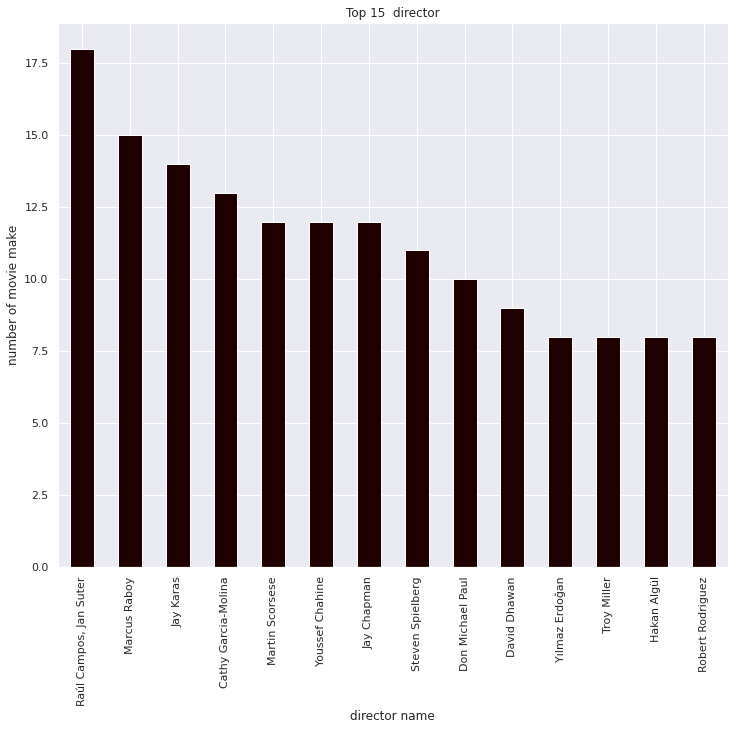

In [34]:
plt.figure(figsize=(12,10))
print(netflix_data.director.value_counts()[:14])
netflix_data.director.value_counts()[:14].plot.bar(colormap='pink')
plt.title('Top 15  director')
plt.xlabel('director name')
plt.ylabel('number of movie make')
plt.show()

# what type of Genos people like to interset


In [25]:
netflix_data.listed_in.value_counts().describe()

count    335.000000
mean      15.916418
std       40.762701
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      336.000000
Name: listed_in, dtype: float64

above `75 percentile` over target, that mean 25% percentage of movie type **people like to watch**

over was skewed std so far away to mean 

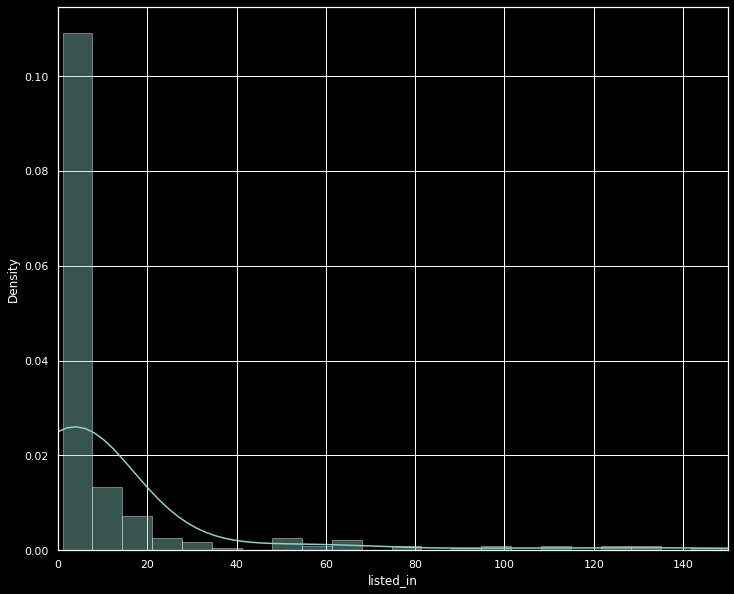

In [26]:
plt.figure(figsize=(12,10))
sns.distplot(netflix_data.listed_in.value_counts())
plt.xlim(0,150)
plt.show()

Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Children & Family Movies                            132
Action & Adventure                                  127
Dramas, International Movies, Thrillers             125
Comedies, Dramas, Independent Movies                114
Name: listed_in, dtype: int64


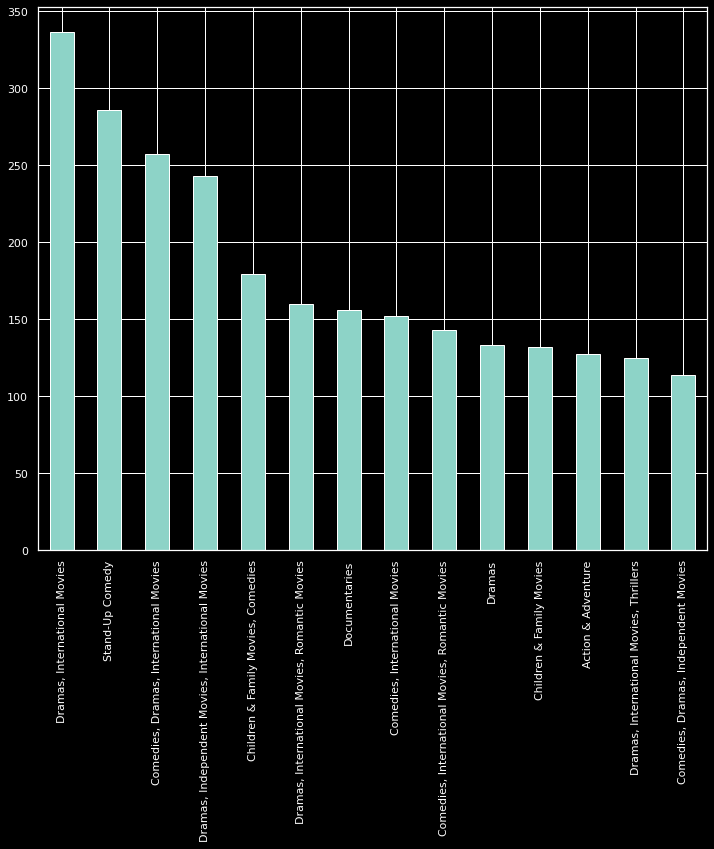

In [27]:
# plt.pcolor(netflix_data, cmap='afmhot_r')
plt.figure(figsize=(12,10))
print(netflix_data.listed_in.value_counts()[:14])
netflix_data.listed_in.value_counts()[:14].plot.bar()

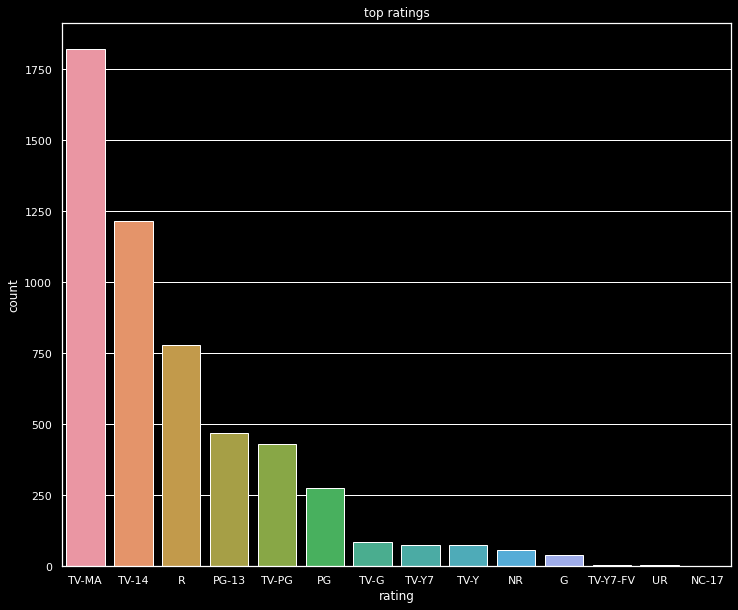

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(netflix_data['rating'],order=netflix_data['rating'].value_counts().index[0:15])
plt.title('top ratings')
plt.show()

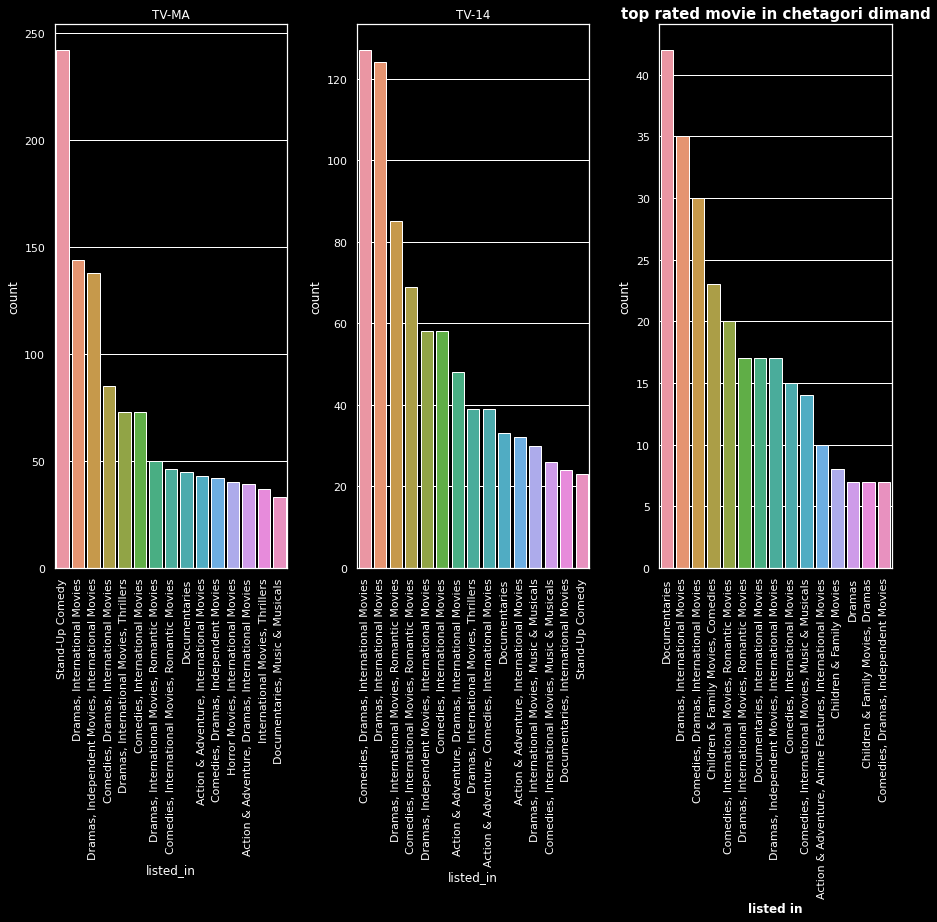

In [29]:
netflix_rate_MA=netflix_data.loc[netflix_data['rating']=='TV-MA']
netflix_rate_14=netflix_data.loc[netflix_data['rating']=='TV-14']
netflix_rate_PG=netflix_data.loc[netflix_data['rating']=='TV-PG']



# print(netflix_rate_MA['listed_in'].value_counts())

fig,ax=plt.subplots(1,3,figsize=(15,10))
ax[0].tick_params(axis='x', rotation=90)
ax[0].title.set_text('TV-MA')

ax[1].tick_params(axis='x', rotation=90)
ax[1].title.set_text('TV-14',)

ax[2].tick_params(axis='x', rotation=90)
ax[2].title.set_text('TV-PG')
plt.subplots_adjust(wspace=0.3)

plt.title('top rated movie in chetagori dimand', fontsize= 15, fontweight='bold')

sns.countplot(netflix_rate_MA['listed_in'],order=netflix_rate_MA['listed_in'].value_counts().index[0:15],ax=ax[0])


sns.countplot(netflix_rate_14['listed_in'],order=netflix_rate_14['listed_in'].value_counts().index[0:15],ax=ax[1])

sns.countplot(netflix_rate_PG['listed_in'],order=netflix_rate_PG['listed_in'].value_counts().index[0:15],ax=ax[2])

plt.xlabel('listed in',fontweight='bold')
plt.show()

top rated movies few catgories always in demond & people most watch :)

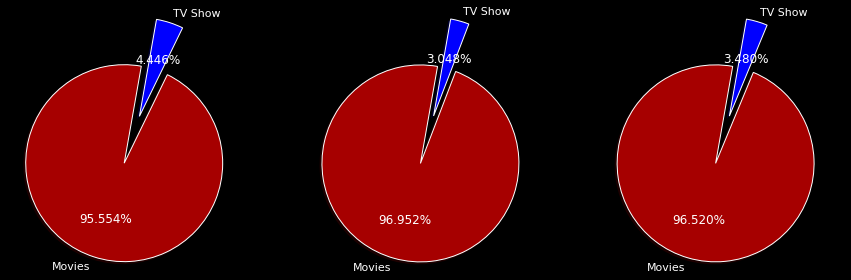

In [30]:
netflix_rate_MA['type'].value_counts()

# plt.figure(figsize=(7,9))
fig,ax=plt.subplots(1,3,figsize=(15,10))
# print(netflix_data['type'].value_counts())
ax[0].pie(netflix_rate_MA['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.2,0.3],colors=['#a60000','blue'],startangle=80)
ax[1].pie(netflix_rate_14['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.2,0.3],colors=['#a60000','blue'],startangle=80)
ax[2].pie(netflix_rate_PG['type'].value_counts(),labels=['Movies','TV Show'],shadow=True,autopct='%1.3f%%',explode =[0.2,0.3],colors=['#a60000','blue'],startangle=80)

plt.show()


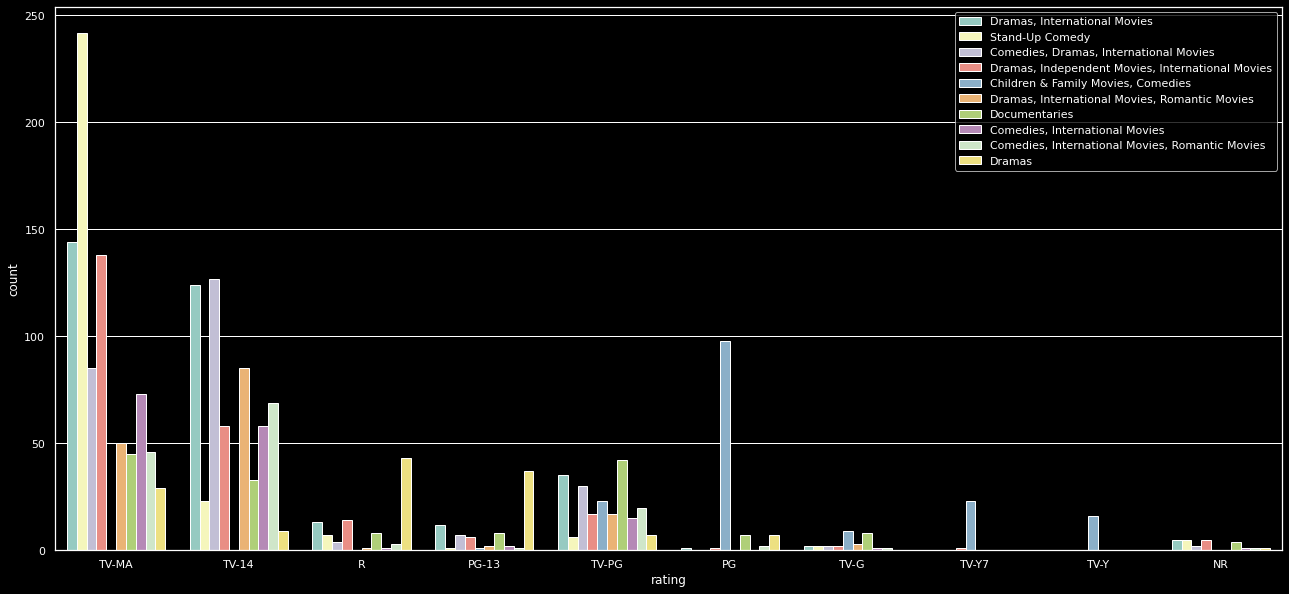

In [31]:
plt.figure(figsize=(22,10))
sns.countplot(hue='listed_in', x='rating',data=netflix_data,order=netflix_data['rating'].value_counts().index[0:10],hue_order=netflix_data['listed_in'].value_counts().index[0:10],)
plt.legend(loc='upper right')
plt.show()

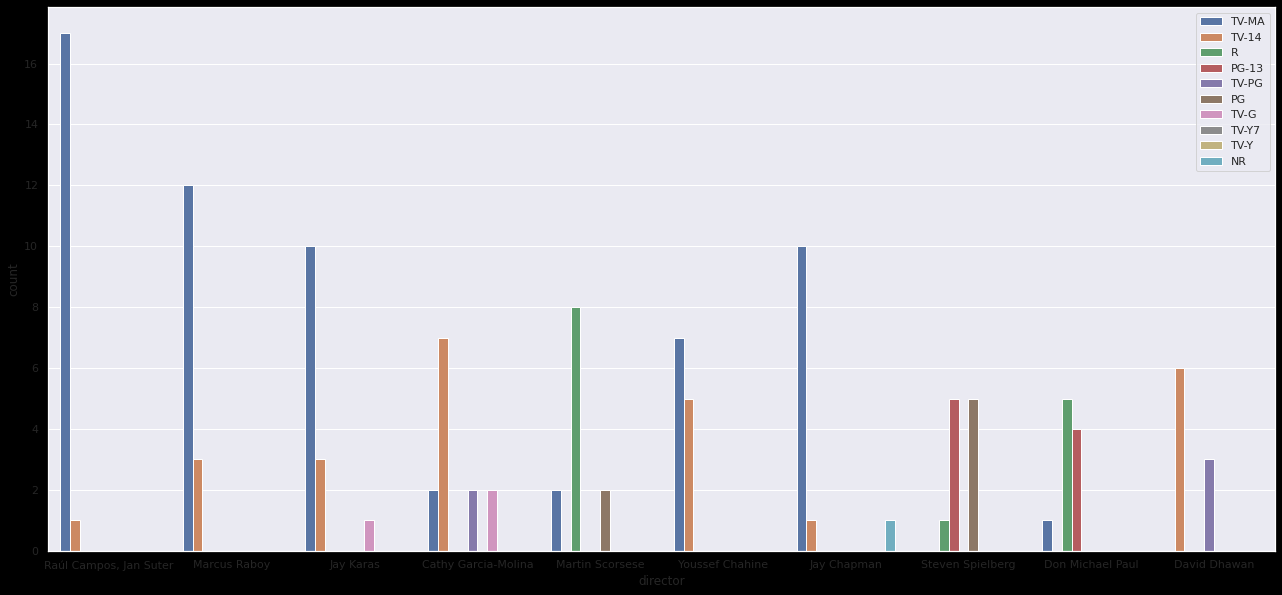

In [32]:
plt.figure(figsize=(22,10))
sns.set_theme(style="darkgrid")
sns.countplot(hue='rating', x='director',data=netflix_data,order=netflix_data['director'].value_counts().index[0:10],hue_order=netflix_data['rating'].value_counts().index[0:10],)
plt.legend(loc='upper right')
plt.show()

In [33]:
# plt.text

**!!!! goal of this notebook is only practice of EDA !!!!**
# plaining

1) univarinat analysis
* catgorical analysis
* numericaly analysis

2) binery analysis

3) multivarient analysis